In [135]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [136]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [137]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [138]:
# List of keywords to include
# List of keywords to include
keywords = [
    'CK_Centrality of Earth',
    'CK_Negligible Dimensions of the Earth',
    'CK_Central Intersection of Eclipses',
    'CK_Visibility of Half of the Sky from the Central Earth',
]

# Combine keywords into a single pattern string
pattern = '|'.join([fr'\b{keyword}\b' for keyword in keywords])

# Filter the DataFrame
centrality_earth = df[df['cks'].str.contains(pattern, case=False, na=False)]

In [139]:
centrality_earth = centrality_earth[['images', 'cluster_name', 'cks', 'bid', 'custom_identifier', 'year', 'place']]
centrality_earth.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

In [140]:
#unique_values = centrality_earth['cluster_name'].unique()
#unique_df = pd.DataFrame(unique_values, columns=['cluster_name'])
#unique_df.to_excel('centrality_earth.xlsx', index=False, sheet_name='Sheet1')

In [141]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [142]:
path_to_xlsx1 = 'C:\\Users\\nogas\\Image_data\\treatises_books_part_types.xlsx'
treatises_books_part_types = pd.read_excel(path_to_xlsx1)
treatises_books_part_types = treatises_books_part_types[['bid', 'custom_identifier', 'part_type']]
treatises_books_part_types.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

In [143]:
# Ensure both DataFrames are not views
centrality_earth = centrality_earth.copy()
treatises_books_part_types = treatises_books_part_types.copy()

# Convert 'part_id' to string in both DataFrames using .loc to avoid SettingWithCopyWarning
centrality_earth.loc[:, 'part_id'] = centrality_earth['part_id'].astype(str)
treatises_books_part_types.loc[:, 'part_id'] = treatises_books_part_types['part_id'].astype(str)

# Perform the merge
centrality_earth_full = pd.merge(centrality_earth, treatises_books_part_types, on='part_id')

centrality_earth_full

C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\895108912.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['100' '240' '291' ... '434' '938' '940']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  treatises_books_part_types.loc[:, 'part_id'] = treatises_books_part_types['part_id'].astype(str)


,images,cluster_name,cks,bid_x,part_id,year,place,bid_y,part_type
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1594,100
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1597,100
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1609,100
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1611,100
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1612,100
...,...,...,...,...,...,...,...,...,...
19147,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00780,CK_Negligible Dimensions of the Earth,1822,295,1618,Lyon,1822,adaption_100
19148,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00780,CK_Negligible Dimensions of the Earth,1822,295,1618,Lyon,2151,adaption_100
19149,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00780,CK_Negligible Dimensions of the Earth,1822,295,1618,Lyon,2278,adaption_100
19150,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00512,"CK_Elevation of the Pole, CK_Centrality of Earth",2265,777,1521,Sine loco,2265,influenced_100


C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\4101797575.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images = centrality_earth_full.groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\4101797575.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  books_count = books.groupby('interval').size()


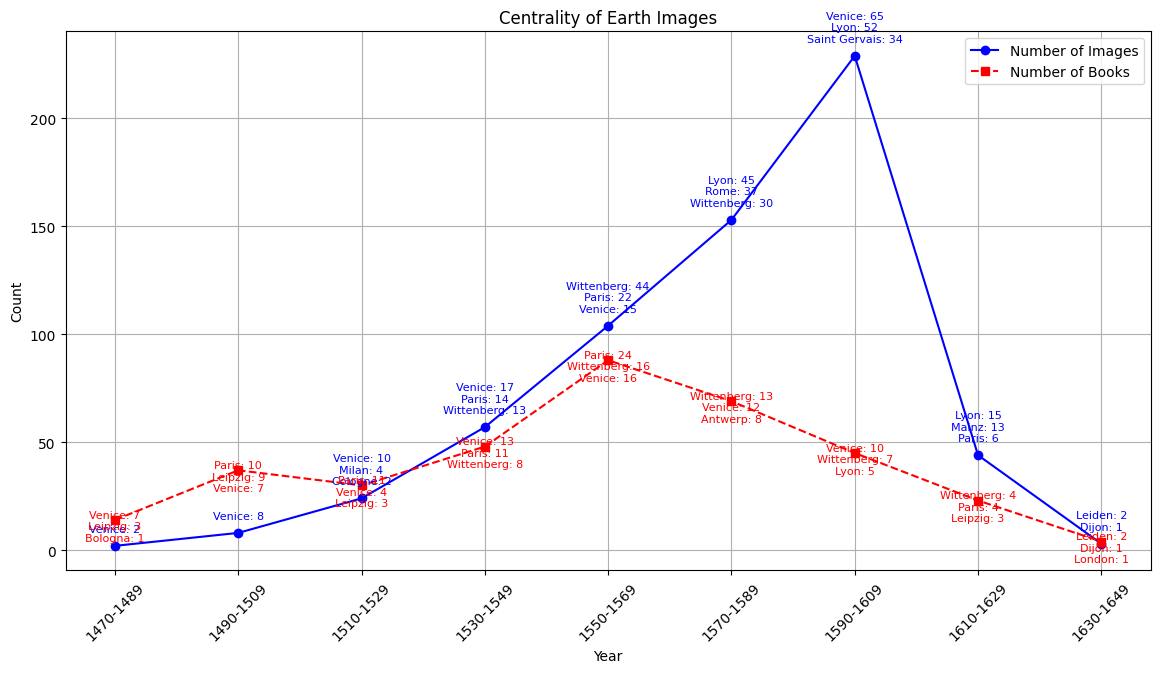

In [144]:
# Ensure the 'year' column is of type int
centrality_earth_full['year'] = centrality_earth_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals in both DataFrames
centrality_earth_full['interval'] = pd.cut(centrality_earth_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by interval and count unique images
unique_images = centrality_earth_full.groupby('interval')['images'].nunique()

# Group by interval and count the number of books
books_count = books.groupby('interval').size()

# Function to get the top three places with the most unique images for each interval
def get_top_places_per_interval(interval):
    interval_df = centrality_earth_full[centrality_earth_full['interval'] == interval]
    top_places = interval_df.groupby('place')['images'].nunique().nlargest(3)
    return top_places

# Function to get the most common places for each interval in the books DataFrame
def get_most_common_places_per_interval(interval):
    interval_df = books[books['interval'] == interval]
    most_common_places = interval_df['place'].value_counts().head(3)
    return most_common_places

# Plot the results
plt.figure(figsize=(14, 7))

# Plot unique images by interval
plt.plot(unique_images.index, unique_images.values, marker='o', linestyle='-', color='blue', label='Number of Images')

# Plot number of books by interval
plt.plot(books_count.index, books_count.values, marker='s', linestyle='--', color='red', label='Number of Books')

# Add annotations for the top three places for unique images
for interval in labels:
    if interval in unique_images.index:
        top_places = get_top_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in top_places.items()])
        
        # Get the y-value for annotation
        unique_image_count = unique_images.loc[interval]
                
        # Annotation for unique images line
        plt.annotate(annotation_text, (interval, unique_image_count), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='blue')

# Add annotations for the most common places for books
for interval in labels:
    if interval in books_count.index:
        common_places = get_most_common_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in common_places.items()])
        
        # Get the y-value for annotation
        book_count = books_count.loc[interval]
                
        # Annotation for books line
        plt.annotate(annotation_text, (interval, book_count), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8, color='red')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Centrality of Earth Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

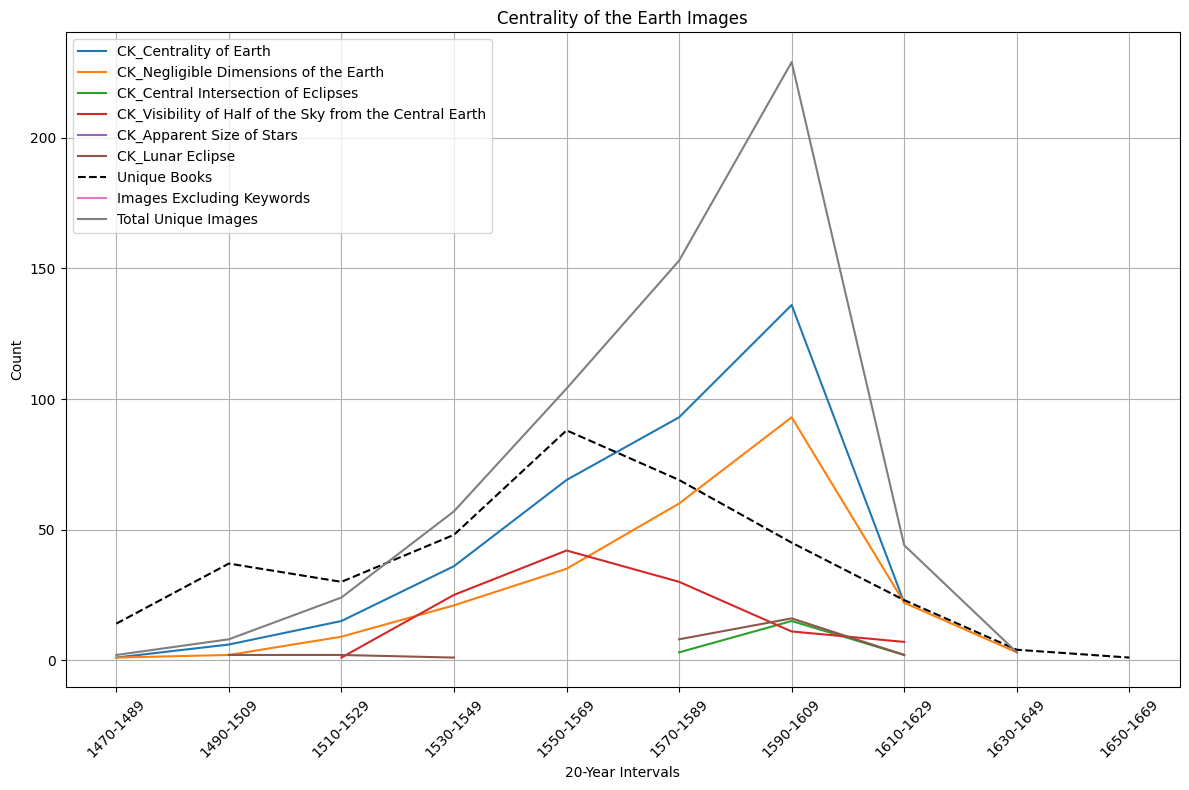

In [145]:
# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650, 1670]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649', '1650-1669']

# Convert year columns to numeric
centrality_earth_full['year'] = pd.to_numeric(centrality_earth_full['year'], errors='coerce')
books['year'] = pd.to_numeric(books['year'], errors='coerce')

# Convert 'cks' column to string
centrality_earth_full['cks'] = centrality_earth_full['cks'].astype(str)

# Add an 'interval' column to both DataFrames
centrality_earth_full['interval'] = pd.cut(centrality_earth_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords and map to desired column names
keywords_list = {
    'CK_Centrality of Earth': 'CK_Centrality of Earth',
    'CK_Negligible Dimensions of the Earth': 'CK_Negligible Dimensions of the Earth',
    'CK_Central Intersection of Eclipses': 'CK_Central Intersection of Eclipses',
    'CK_Visibility of Half of the Sky from the Central Earth': 'CK_Visibility of Half of the Sky from the Central Earth',
    'CK_Apparent Size of Stars': 'CK_Apparent Size of Stars',
    'CK_Lunar Eclipse': 'CK_Lunar Eclipse'
}

# Function to count unique images for each keyword
def count_unique_images_for_keyword(keyword):
    return centrality_earth_full[centrality_earth_full['cks'].str.contains(keyword, na=False)].groupby('interval', observed=True)['images'].nunique()

# Prepare data for plotting
plot_data = pd.DataFrame(index=labels)

# Collect unique images for each keyword
for label, keyword in keywords_list.items():
    plot_data[label] = count_unique_images_for_keyword(keyword)

# Calculate number of unique books in each interval
book_counts = books.groupby('interval', observed=True)['book'].nunique()
plot_data['Unique Books'] = book_counts

# Calculate number of unique images that do not have the specified keywords
def count_unique_images_excluding_keywords(keywords):
    mask = centrality_earth_full['cks'].str.contains('|'.join(keywords), na=False)
    return centrality_earth_full[~mask].groupby('interval', observed=True)['images'].nunique()

plot_data['Images Excluding Keywords'] = count_unique_images_excluding_keywords(list(keywords_list.values()))

# Calculate total number of unique images in each interval
total_unique_images = centrality_earth_full.groupby('interval', observed=True)['images'].nunique()
plot_data['Total Unique Images'] = total_unique_images

# Plotting
plt.figure(figsize=(12, 8))

# Plot each line with default color and style
for column in plot_data.columns:
    if column == 'Unique Books':
        plt.plot(plot_data.index, plot_data[column], label=column, color='black', linestyle='--')
    else:
        plt.plot(plot_data.index, plot_data[column], label=column)

plt.xlabel('20-Year Intervals')
plt.ylabel('Count')
plt.title('Centrality of the Earth Images')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [146]:
path_to_xlsx = 'C:\\Users\\nogas\\Image_data\\centrality_earth.xlsx'
centrality_earth_visual = pd.read_excel (path_to_xlsx)
centrality_earth_with_visual = pd.merge(centrality_earth_full, centrality_earth_visual, on='cluster_name')
centrality_earth_with_visual

,images,cluster_name,cks,bid_x,part_id,year,place,bid_y,part_type,interval,...,color,human figures,full circle,decoration,material object figurative element,armilary sphere handle,eye,multiple moments,multiple perspectives,ad absurdum
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1594,100,1470-1489,...,yes,no,yes,no,no,no,no,no,no,no
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1597,100,1470-1489,...,yes,no,yes,no,no,no,no,no,no,no
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1609,100,1470-1489,...,yes,no,yes,no,no,no,no,no,no,no
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1611,100,1470-1489,...,yes,no,yes,no,no,no,no,no,no,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02805,"CK_Centrality of Earth, CK_Visibility of Half ...",1928,100,1485,Venice,1612,100,1470-1489,...,yes,no,yes,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00780,CK_Negligible Dimensions of the Earth,1822,295,1618,Lyon,1822,adaption_100,1610-1629,...,no,no,yes,no,no,no,no,no,yes,yes
19148,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00780,CK_Negligible Dimensions of the Earth,1822,295,1618,Lyon,2151,adaption_100,1610-1629,...,no,no,yes,no,no,no,no,no,yes,yes
19149,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00780,CK_Negligible Dimensions of the Earth,1822,295,1618,Lyon,2278,adaption_100,1610-1629,...,no,no,yes,no,no,no,no,no,yes,yes
19150,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00512,"CK_Elevation of the Pole, CK_Centrality of Earth",2265,777,1521,Sine loco,2265,influenced_100,1510-1529,...,no,yes,yes,no,no,no,no,no,yes,no


C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\1680920409.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\1680920409.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\1680920409.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

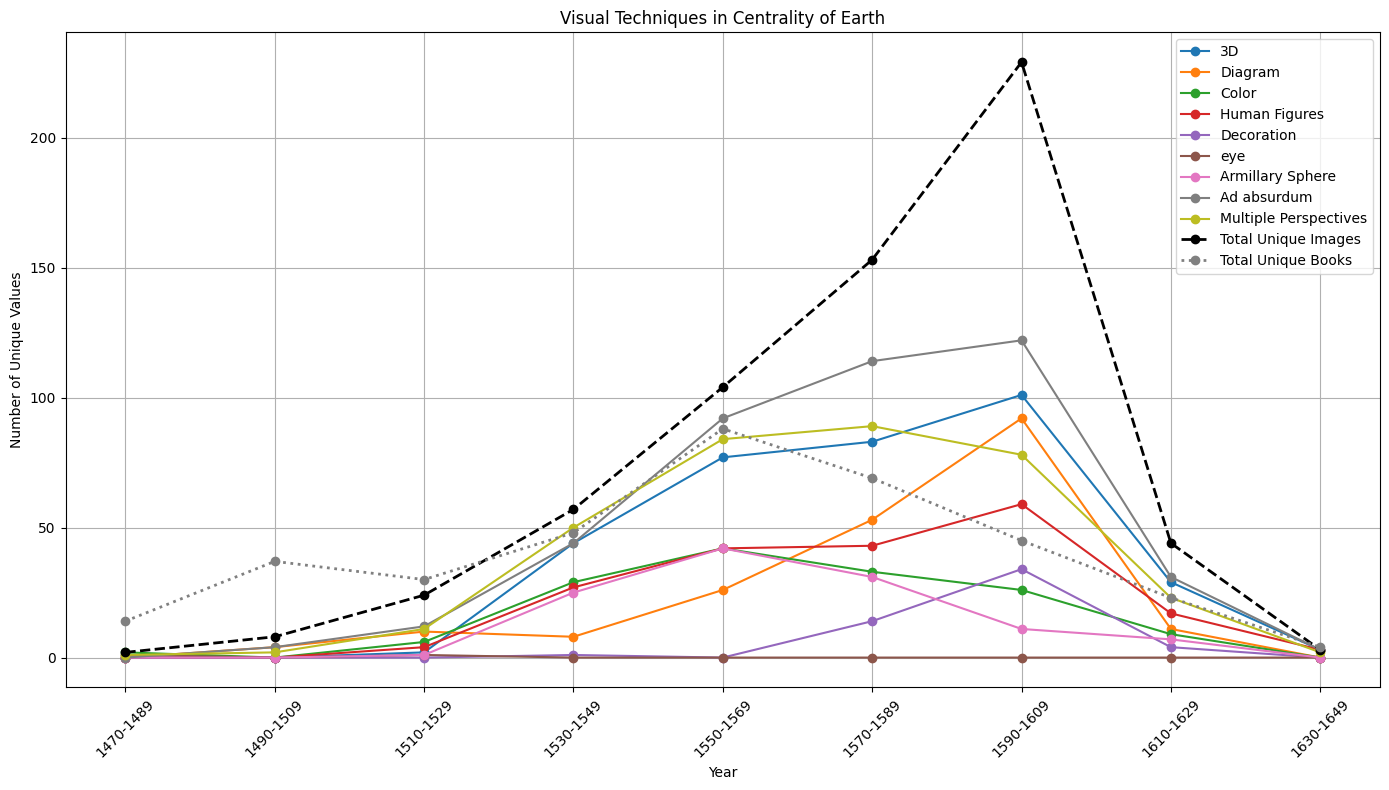

In [150]:
# Convert 'year' to int
centrality_earth_with_visual['year'] = centrality_earth_with_visual['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
centrality_earth_with_visual['interval'] = pd.cut(centrality_earth_with_visual['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = centrality_earth_with_visual[centrality_earth_with_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with corrected variable names
three_dimensions_effect = count_unique_images_by_column('3D effect', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
color = count_unique_images_by_column('color', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
decoration = count_unique_images_by_column('decoration', 'yes')
eye = count_unique_images_by_column('eye', 'yes')
armillary_sphere = count_unique_images_by_column('armilary sphere handle', 'yes')
ad_absurdum = count_unique_images_by_column('ad absurdum', 'yes')
multiple_perspectives = count_unique_images_by_column('multiple perspectives', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Diagram': diagram,
    'Color': color,
    'Human Figures': human_figures,
    'Decoration': decoration,
    'eye': eye,
    'Armillary Sphere': armillary_sphere,
    'Ad absurdum': ad_absurdum,
    'Multiple Perspectives': multiple_perspectives
})

# Ensure 'books' DataFrame is defined and has the correct columns
# Assume 'books' DataFrame is structured similarly
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Calculate total number of unique images for each interval
total_unique_images = centrality_earth_with_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Centrality of Earth')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\3890237274.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\3890237274.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\3890237274.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

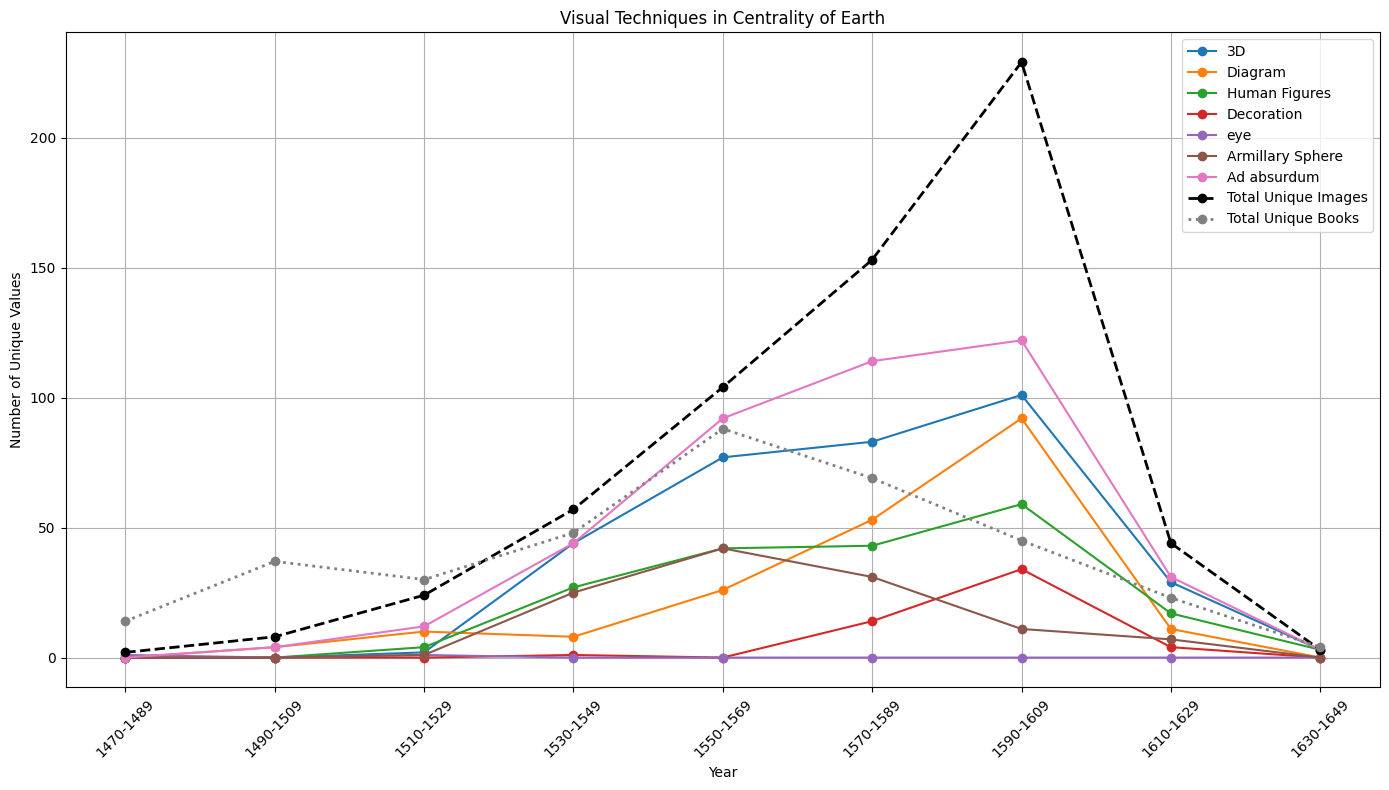

In [151]:
# Convert 'year' to int
centrality_earth_with_visual['year'] = centrality_earth_with_visual['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
centrality_earth_with_visual['interval'] = pd.cut(centrality_earth_with_visual['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = centrality_earth_with_visual[centrality_earth_with_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with corrected variable names
three_dimensions_effect = count_unique_images_by_column('3D effect', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
decoration = count_unique_images_by_column('decoration', 'yes')
eye = count_unique_images_by_column('eye', 'yes')
armillary_sphere = count_unique_images_by_column('armilary sphere handle', 'yes')
ad_absurdum = count_unique_images_by_column('ad absurdum', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Diagram': diagram,
    'Human Figures': human_figures,
    'Decoration': decoration,
    'eye': eye,
    'Armillary Sphere': armillary_sphere,
    'Ad absurdum': ad_absurdum,
})

# Ensure 'books' DataFrame is defined and has the correct columns
# Assume 'books' DataFrame is structured similarly
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Calculate total number of unique images for each interval
total_unique_images = centrality_earth_with_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Centrality of Earth')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\57037496.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\57037496.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_4896\57037496.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain cur

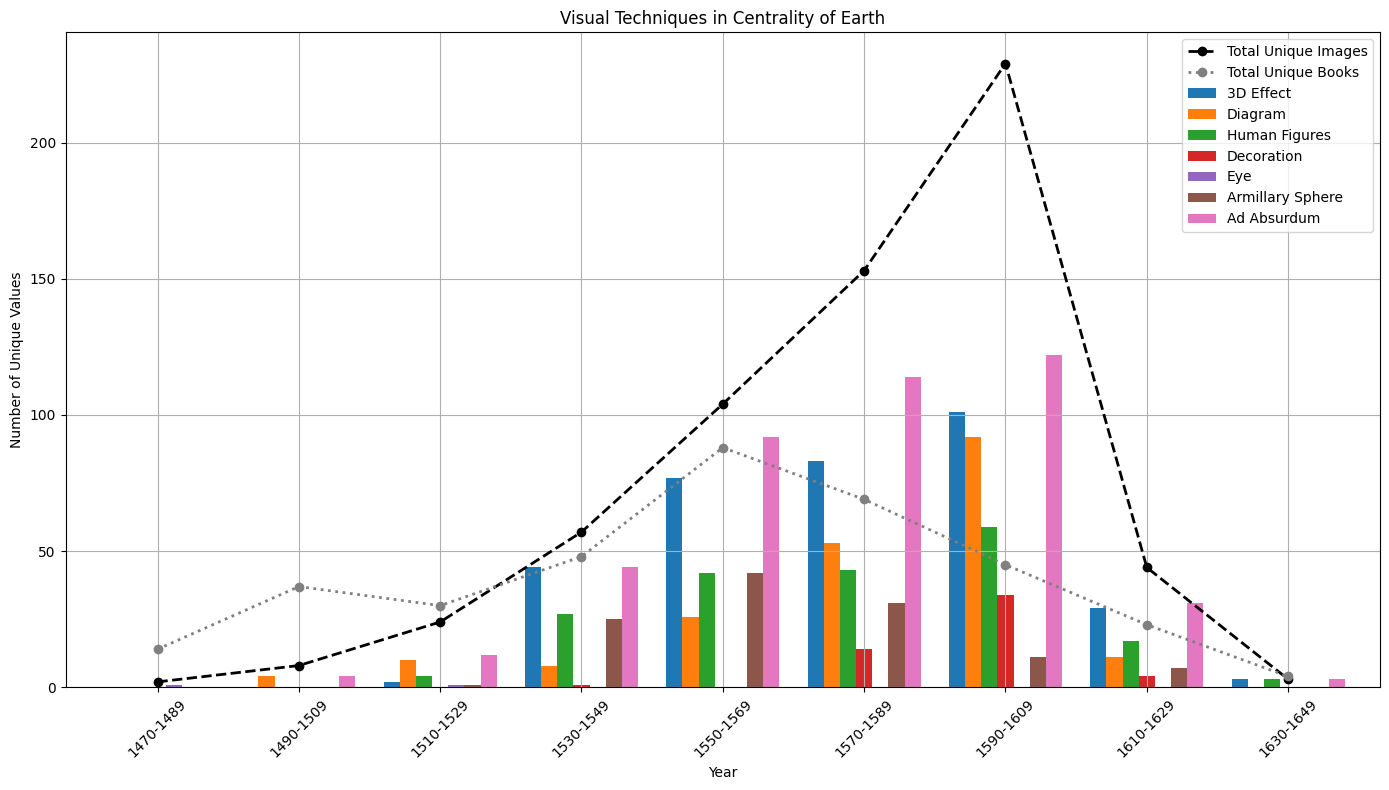

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'year' to int
centrality_earth_with_visual['year'] = centrality_earth_with_visual['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
centrality_earth_with_visual['interval'] = pd.cut(centrality_earth_with_visual['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = centrality_earth_with_visual[centrality_earth_with_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with corrected variable names
three_dimensions_effect = count_unique_images_by_column('3D effect', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
decoration = count_unique_images_by_column('decoration', 'yes')
eye = count_unique_images_by_column('eye', 'yes')
armillary_sphere = count_unique_images_by_column('armilary sphere handle', 'yes')
ad_absurdum = count_unique_images_by_column('ad absurdum', 'yes')

# Combine the data for bars
side_by_side_data = pd.DataFrame({
    '3D Effect': three_dimensions_effect,
    'Diagram': diagram,
    'Human Figures': human_figures,
    'Decoration': decoration,
    'Eye': eye,
    'Armillary Sphere': armillary_sphere,
    'Ad Absurdum': ad_absurdum,
})

# Ensure 'books' DataFrame is defined and has the correct columns
# Assume 'books' DataFrame is structured similarly
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)

# Calculate total number of unique images for each interval
total_unique_images = centrality_earth_with_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot side-by-side bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bar chart
side_by_side_data.plot(kind='bar', ax=ax, width=0.8)

# Plot the lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Number of Unique Values')
plt.title('Visual Techniques in Centrality of Earth')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


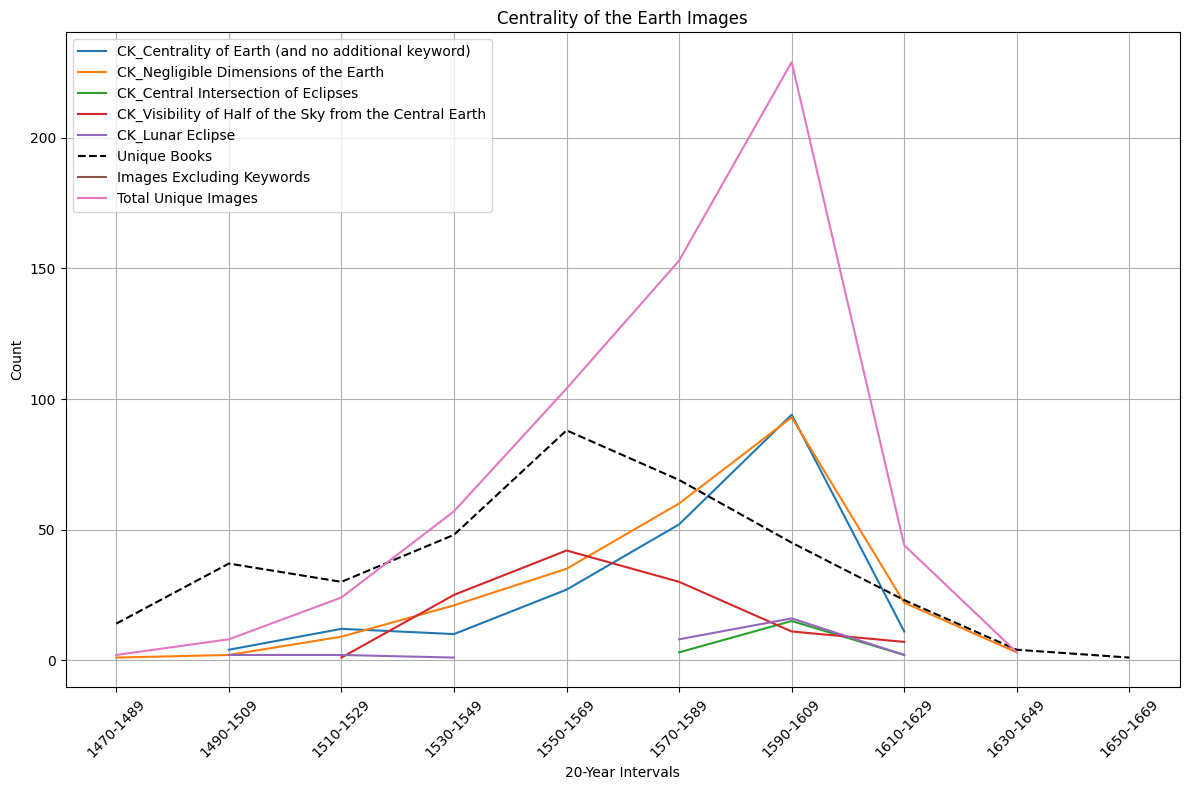

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650, 1670]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649', '1650-1669']

# Convert year columns to numeric
centrality_earth_full['year'] = pd.to_numeric(centrality_earth_full['year'], errors='coerce')
books['year'] = pd.to_numeric(books['year'], errors='coerce')

# Convert 'cks' column to string
centrality_earth_full['cks'] = centrality_earth_full['cks'].astype(str)

# Add an 'interval' column to both DataFrames
centrality_earth_full['interval'] = pd.cut(centrality_earth_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords and map to desired column names
keywords_list = {
    'CK_Centrality of Earth (and no additional keyword)': 'CK_Centrality of Earth',
    'CK_Negligible Dimensions of the Earth': 'CK_Negligible Dimensions of the Earth',
    'CK_Central Intersection of Eclipses': 'CK_Central Intersection of Eclipses',
    'CK_Visibility of Half of the Sky from the Central Earth': 'CK_Visibility of Half of the Sky from the Central Earth',
    'CK_Lunar Eclipse': 'CK_Lunar Eclipse'
}

# Function to count unique images for a specific keyword excluding others
def count_unique_images_for_exact_keyword(keyword):
    # Create a mask for images containing the exact keyword and not containing any other keywords
    exact_keyword_mask = centrality_earth_full['cks'].str.contains(keyword, na=False)
    other_keywords_mask = centrality_earth_full['cks'].str.contains('|'.join([kw for kw in keywords_list.values() if kw != keyword]), na=False)
    
    # Filter data
    filtered_data = centrality_earth_full[exact_keyword_mask & ~other_keywords_mask]
    
    # Count unique images
    return filtered_data.groupby('interval', observed=True)['images'].nunique()

# Function to count unique images excluding specified keywords
def count_unique_images_excluding_keywords(keywords):
    mask = centrality_earth_full['cks'].str.contains('|'.join(keywords), na=False)
    return centrality_earth_full[~mask].groupby('interval', observed=True)['images'].nunique()

# Prepare data for plotting
plot_data = pd.DataFrame(index=labels)

# Collect unique images for each keyword
for label, keyword in keywords_list.items():
    if keyword == 'CK_Centrality of Earth':
        plot_data[label] = count_unique_images_for_exact_keyword(keyword)
    else:
        plot_data[label] = count_unique_images_for_keyword(keyword)

# Calculate number of unique books in each interval
book_counts = books.groupby('interval', observed=True)['book'].nunique()
plot_data['Unique Books'] = book_counts

# Calculate number of unique images that do not have the specified keywords
plot_data['Images Excluding Keywords'] = count_unique_images_excluding_keywords(list(keywords_list.values()))

# Calculate total number of unique images in each interval
total_unique_images = centrality_earth_full.groupby('interval', observed=True)['images'].nunique()
plot_data['Total Unique Images'] = total_unique_images

# Plotting
plt.figure(figsize=(12, 8))

# Plot each line with default color and style
for column in plot_data.columns:
    if column == 'Unique Books':
        plt.plot(plot_data.index, plot_data[column], label=column, color='black', linestyle='--')
    else:
        plt.plot(plot_data.index, plot_data[column], label=column)

plt.xlabel('20-Year Intervals')
plt.ylabel('Count')
plt.title('Centrality of the Earth Images')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
